In [1]:
class DiGraph:
    def __init__(self):
        self.g={}
    def add_node(self,node):
        if node not in self.g:
            self.g[node]=[]
        else:
            raise ValueError("NODE ALREADY IN GRAPH")
    def add_edge(self,source,destination):
        if source not in self.g:
            raise KeyError("SOURCE NODE NOT IN GRAPH")
        if destination not in self.g:
            raise KeyError("DESTINATION NODE NOT IN GRAPH")
        if destination not in self.g[source]:
            self.g[source].append(destination)
    def __str__(self):
        return str(self.g)
  

In [2]:
g=DiGraph()
nodes=['a','b','c','d','e','f']
edges=[('a','b'),('a','c'),('b','c') ,('b','d'),('c','d'),('d','c'),('e','f'),('f','c')]
for i in nodes:
    g.add_node(i)
for i in edges:
    g.add_edge(i[0],i[1])

In [3]:
import pprint


In [4]:
print(g)

{'a': ['b', 'c'], 'b': ['c', 'd'], 'c': ['d'], 'd': ['c'], 'e': ['f'], 'f': ['c']}


# Find All Paths

In [76]:
def find_all_paths(self,start,end,path=[]):
        if start not in self.g or end not in self.g:
            raise NodeError("NODE NOT IN GRAPH")
        path=path+[start]

        if start==end:
            return [path]
        all_path=[]
        for nodes in self.g[start]:
            if nodes not in path:
                all_newpath=self.find_all_paths(nodes,end,path)
                for new_path in all_newpath:
                    all_path.append(new_path)
        return all_path

DiGraph.find_all_paths=find_all_paths

In [95]:
g.find_all_paths('a','a')

[['a']]

# SHORTEST PATH

In [107]:
def find_shortest_paths(self,start,end,path=[]):
        if start not in self.g or end not in self.g:
            raise NodeError("NODE NOT IN GRAPH")
        path=path+[start]

        if start==end:
            return path
        shortest_path=None    
        for nodes in self.g[start]:
            if nodes not in path:
                newpath=self.find_shortest_paths(nodes,end,path)
                if newpath:
                    if shortest_path is None or len(newpath)<len(shortest_path):
                        shortest_path=newpath
       
        return shortest_path

DiGraph.find_shortest_paths=find_shortest_paths

In [108]:
g.find_shortest_paths('a','d')

['a', 'b', 'd']

In [109]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph):
    G = nx.DiGraph()

    # Add nodes to the graph
    for node in graph.g.keys():
        G.add_node(node)

    # Add edges to the graph
    for source, destinations in graph.g.items():
        for destination in destinations:
            G.add_edge(source, destination)

    # Create a layout for the graph
    pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', arrows=True)

    # Show the graph
    plt.show()


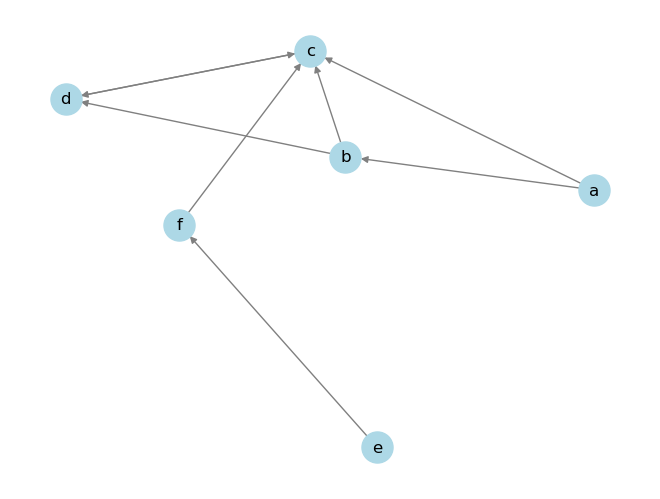

In [90]:
visualize_graph(g)